In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization,Conv2D,MaxPooling2D,Activation,Flatten,Dropout,Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import numpy as np
import random
import os
import glob
import cv2

In [70]:
import matplotlib.pyplot as plt

In [58]:
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []


image_files = [f for f in glob.glob(r'C:/Users/patil/ML_project/Gender/gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [59]:
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2]
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) 

In [60]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [61]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,random_state=42)

In [62]:
trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

In [63]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [65]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

In [66]:
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

C:\Users\patil\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [67]:
history = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

C:\Users\patil\AppData\Local\Temp/ipykernel_17252/3978930398.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


Epoch 1/100
28/28 [==============================] - 30s 1s/step - loss: 0.7945 - accuracy: 0.7187 - val_loss: 0.7166 - val_accuracy: 0.5087
Epoch 2/100
28/28 [==============================] - 30s 1s/step - loss: 0.4936 - accuracy: 0.8091 - val_loss: 0.6490 - val_accuracy: 0.5216
Epoch 3/100
28/28 [==============================] - 29s 1s/step - loss: 0.4264 - accuracy: 0.8383 - val_loss: 0.8254 - val_accuracy: 0.4913
Epoch 4/100
28/28 [==============================] - 37s 1s/step - loss: 0.4022 - accuracy: 0.8372 - val_loss: 0.6822 - val_accuracy: 0.4978
Epoch 5/100
28/28 [==============================] - 31s 1s/step - loss: 0.3198 - accuracy: 0.8759 - val_loss: 1.1238 - val_accuracy: 0.4913
Epoch 6/100
28/28 [==============================] - 30s 1s/step - loss: 0.3182 - accuracy: 0.8681 - val_loss: 0.8443 - val_accuracy: 0.4913
Epoch 7/100
28/28 [==============================] - 42s 2s/step - loss: 0.3314 - accuracy: 0.8641 - val_loss: 0.6446 - val_accuracy: 0.5325
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 32s 1s/step - loss: 0.0576 - accuracy: 0.9742 - val_loss: 0.1168 - val_accuracy: 0.9654
Epoch 60/100
28/28 [==============================] - 31s 1s/step - loss: 0.0530 - accuracy: 0.9815 - val_loss: 0.0736 - val_accuracy: 0.9719
Epoch 61/100
28/28 [==============================] - 39s 1s/step - loss: 0.0636 - accuracy: 0.9730 - val_loss: 0.0736 - val_accuracy: 0.9697
Epoch 62/100
28/28 [==============================] - 37s 1s/step - loss: 0.0541 - accuracy: 0.9787 - val_loss: 0.3547 - val_accuracy: 0.9199
Epoch 63/100
28/28 [==============================] - 34s 1s/step - loss: 0.0525 - accuracy: 0.9854 - val_loss: 0.1644 - val_accuracy: 0.9459
Epoch 64/100
28/28 [==============================] - 34s 1s/step - loss: 0.0594 - accuracy: 0.9798 - val_loss: 0.0712 - val_accuracy: 0.9762
Epoch 65/100
28/28 [==============================] - 35s 1s/step - loss: 0.0521 - accuracy: 0.9820 - val_loss: 0.0692 - val_accuracy: 0.9827
Epoch 

In [68]:
model.save('gender_detection.model')

INFO:tensorflow:Assets written to: gender_detection.model\assets


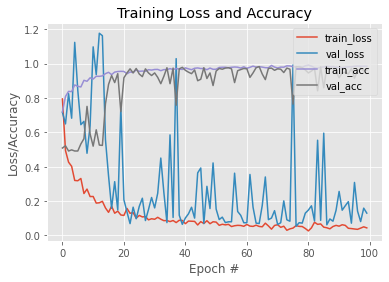

In [74]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

In [77]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv

In [78]:
model = load_model('gender_detection.model')

In [79]:
webcam = cv2.VideoCapture(0)
    
classes = ['man','woman']

In [80]:
while webcam.isOpened():
    status, frame = webcam.read()

    face, confidence = cv.detect_face(frame)



    for idx, f in enumerate(face):

    
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]


        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)


        face_crop = np.copy(frame[startY:endY,startX:endX])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue


        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)


        conf = model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]


        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10


        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)


    cv2.imshow("gender detection", frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


webcam.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 